# 机器学习 - K-means

在本次实验中，我们将实现K-means聚类，并使用它来压缩图像。 我们将从一个简单的2D数据集开始，以了解K-means是如何工作的，然后我们将其应用于图像压缩。 

## K-means 聚类

 K-means是一个迭代的，无监督的聚类算法，将类似的样本组合成簇。 该算法通过猜测每个簇的初始聚类中心开始，然后重复将实例分配给最近的簇，并重新计算该簇的聚类中心。 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


In [2]:
data = loadmat('data/ex7data2.mat')
X = data['X']
#initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [3]:
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


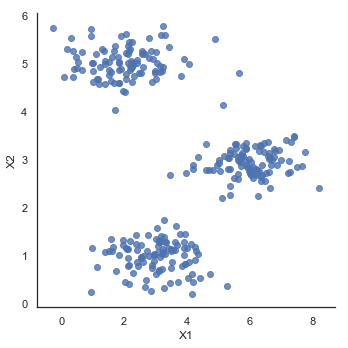

In [4]:
sb.set(context="notebook", style="white")
sb.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

<font color=red size=3> #############任务一请在下面写出初始化中心点的函数#################### </font>

In [5]:
def init_centroids(X, k):
   #补全代码



    
    return centroids

In [6]:
initial_centroids=init_centroids(X, 3)
initial_centroids

array([[6.5110074 , 2.72731907],
       [5.05274526, 2.75692163],
       [1.67838038, 5.26903822]])

<font color=red size=3> #############任务二请在下面写出计算样本点最近的中心点的函数#################### </font>

In [7]:
def find_closest_centroids(X, centroids):
    
     #补全代码
        
        
        
    
    return idx

In [8]:
idx = find_closest_centroids(X, initial_centroids)
idx[0:5]

array([2., 1., 0., 2., 2.])

<font color=red size=3> #############任务三请在下面写出计算簇的聚类中心的函数。#################### </font> 聚类中心只是当前分配给簇的所有样本的平均值。

In [9]:
def compute_centroids(X, idx, k):
   
 #补全代码
    
    
    
    

    
    return centroids

In [10]:
compute_centroids(X, idx, 3)

array([[6.5559402 , 2.95098821],
       [3.70459727, 1.60812958],
       [1.94403425, 4.98654075]])

为了运行算法，我们只需要在将样本分配给最近的簇并重新计算簇的聚类中心。

In [11]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [12]:
idx, centroids = run_k_means(X, initial_centroids, 10)

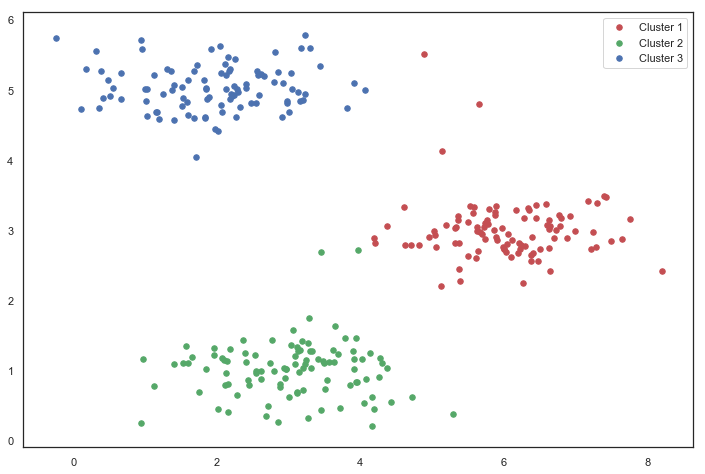

In [13]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()